`-----------------------------------------------------WARNING------------------------------------------------------------------`

On section 5 is a code block which calls a function with high time processing (29 minutes aproximately). Select "Run all." on Cell window prudently.

`-----------------------------------------------------WARNING------------------------------------------------------------------`

----

## Introduction

We are working for a company named Beta Bank, a company of the banking industry. In the past months they have noticed more clients have exited their services with Beta Bank and have decided the best strategy is to retain the greatest amount of customers they can before focusing on getting more customers.

To make this possible, Beta Bank needs us to create a new model which can predict wether a customer will exit their services or not. Beta Bank has give us the information for the behaviour of it's customers and if they have exited or not to generate the model.

## Preparing the data

Let's visualize the data Beta Bank gave us and see what kind of preprocessing we need to apply before start working. To make this possible we will follow the next steps:

### Importing libraries

These are the libraries/modules we'll need for this project.

In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

### Processing the data

Once we have the information saved on the variable `data`, let's see what we have and then determine if a preprocessing is necessary.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

#### Understanding the dataset

Let's see the information we have and remember what is the meaning of all the columns on the dataset.

Features:
 * `RowNumber`: index of data
 * `CustomerId`: customer's identifier
 * `Surname`: customer's surname
 * `CreditScore`: customer's credit value
 * `Geography`: customer's residence country
 * `Gender`: customer's gender
 * `Age`: customer's age
 * `Tenure`: period of time a customer's credit score has (in years)
 * `Balance`: customer's account balance
 * `NumOfProducts`: banking products used by the customer
 * `HasCrCard`: status of a customer possesing a credit card (1 - yes; 0 - no)
 * `IsActiveMember`: status marking if a customer is active or not (1 - yes; 0 - no)
 * `EstimatedSalary`: customer's estimated salary
 
Target:
 * `Exited`: status marking if a customer is not exited from the bank service (1 - yes; 0 - no)
 
With this information in hand we can countine with a deeper analysis of the dataset.

In [3]:
print(data.head())
print()
print(data.info())
print()
print(data.describe(include='all'))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Seeing this new information we can see there are a few points we must change and check on the dataset:

 * Change the column names to an lower case and snake case naming.
 * Fill the missing values of the 'Tenure' column.
 * Check if column 'Tenure' can be changed to int data type.
 * Check for duplicated rows.

#### Applying changes

As we could see on previous section we need to work on the dataset before processing the information. This help us to avoid future probles due to the form the data may have in the dataset, so making the necessary changes on the data is necessary on every project we may have in the future.

Let's begin with the changes:

##### New columns names

Currently we have our column names with capitalized, and if this is not necessarily a problem is better to have the naming of the column in way we can work easier with them, ex.: lower case and snake case naming combination.

We will chane the names to fit this new format we will be working with.

In [4]:
# Creating a new list with the new names for the columns
new_columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [5]:
# Changing current names with new names
data.columns = new_columns

In [6]:
# Printing new current names
print(data.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


##### Filling missing values on column 'Tenure'

We need to fill the 909 missing values on 'Tenure' column. This column has float64 dtype, so we shall fill it with a numeric value; let's determine whether the mean value or the median value of the column is the better option.

In [7]:
print(f"Mean value: {data['tenure'].mean()}")
print()
print(f"Median value: {data['tenure'].median()}")

Mean value: 4.997690023099769

Median value: 5.0


We can see there is no big difference between these 2 values (aproximately 0.003), so let's fill it with the median. This is because the values on this column are all integer numbers (see the unique values on the column). Once filled with the median value check again if the change was correctly applied.

In [8]:
data['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [9]:
data['tenure'].fillna(data['tenure'].median(), inplace=True)
data['tenure'].isna().sum()

0

##### Check if is valid chaning column 'Tenure' to int data type

As we could see on the previous section all values can be represented as integers, so let's check if no data will be lost if we make the dtype change on the column, and in case we have no information loss change the column dtype.

In [10]:
if np.array_equal(data['tenure'], data['tenure'].astype('int')) == True:
    
    data['tenure'] = data['tenure'].astype('int')

In [11]:
data['tenure'].dtype

dtype('int64')

The changes were applied correctly and the column has a new dtype `int64`.

##### Check duplicated rows

We are not sure if our dataset has duplicates so let's check this up (we can assure there are not duplicates if we can confirm all values on 'customer_id' column are different, but let's use the tools our libraries give us).

In [12]:
data.duplicated().sum()

0

Now we are sure there are no duplicates on the dataset. Let's see how our dataset is after the changes we applied.

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


## Encoding and scaling the information

Once our information is complete and we can assure there are no missing values and all columns have adequate dtypes we can procced with the class balancing. We need to process our data this way to assure all of our variables have the appropiate "weight" on the algorithms we will be using to generate our predictive models, this means we need to encode and/or scale them properly depending of what our information means.

Let's see how our information changes with this process.

### Before starting

Before staring encoding and scalating is necessary to determine what information we have to know what we need to do to that same information, so let's take a quick look to our information again:

 * Categoric variables
     * `row_number`: A number which represents the index of the table.
     * `customer_id`: An identifier number for each customer.
     * `surname`: The surname of the customer.
     * `geography`: The country of the customer.
     * `gender`: The gender of the customer.
     * `has_cr_card`: A number (boolean) which means if a customer has a credit card or not.
     * `is_active_member`: A number (boolean) which means if a customer is active or not.
     * `exited`: A number (boolean) which means if a customer has quit the service or not.
     
     
 * Numeric variables
     * `credit_score`: Score of the customer's account.
     * `age`: Age of the customer.
     * `tenure`: Tenure of the customer's account.
     * `balance`: Balance in the customer's account.
     * `num_of_products`: Number of banking products a customer has.
     * `estimated_salary`: Estimated salary for a customer.
     
Now that we know the kind of variables (columns) we have is easier to determine in which we have to apply an encoding or an scaling, but we have to apply one of those for all our variables? We will follow the next points to balance our information:

1.- There are variables in which has sense to think are relevant to the prediction, but this is not the case for columns `"row_number"`, `"customer_id"` and `"surname"`. This is because those columns do not have relevant value that can have relation with our interest values: why a specific customer's id, surname or order in the table is relevant to predict if they will exit the back services? This is why we will not use the values on it for the models we will generate and will only categorize the following features: `"geography"`, `"gender"`, `"has_cr_card"` & `"is_active_member"`.

2.- In case of scaling, we will apply it on all the numeric variables on our dataset.

3.- For the column `"exited"` (which is our target), we will not apply an encoding to it becaused is already encoded as we need (0s and 1s).

-------------------------------------------------------------------------------------------------------------------------------
----------

Now is time to define our goal:

`The goal is to obtain a model with an F1 score of 0.65 or above.`

### Defining features and target

Before starting let's define our features and target for this project:

 * Target: "exited" column.
 * Features: All columns except "exited", "row_number", "customer_id" and "surname" columns.
 
With this in mind we can proceed with further steps of the project.

In [14]:
features = data.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1)
target = data['exited']

Something we will be using for the data in all our models are our lists categorics and numerics which has on them the names of the columns which must have an encoding (categorics list) or the names of the columns which must have an scaling (numerics list). The type of encoding will vary depending of the model we will use on the data but the scaling will be the same for all the different kinds of data.

In [82]:
categorics = ['geography', 'gender', 'has_cr_card', 'is_active_member']
numerics = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

### Ordinal Encoding and scaling

The first type of encoding we will be using is the Ordinal Encoding (in this case we will use it to encode nominal variables). The data we encode this way will be used for the RandomForestClassifier models on the project. Let's see the way our data changes with this encoding.

In [83]:
encoder = OrdinalEncoder()
feat_nom = pd.DataFrame(encoder.fit_transform(features[categorics]), columns=features[categorics].columns)
feat_nom = pd.concat([feat_nom, features[numerics]], axis=1)

Once the encoding is done we can see the columns "geography" and "gender" changed ther values to numeric type values: in case of "geography" the values are from 0-2 and for "gender" are 0-1. But for columns "has_cr_card" and "is_active_,member" no change was made because those columns already had numeric type values (0 and 1 on both of them).

In [16]:
feat_nom.head()

,geography,gender,has_cr_card,is_active_member,credit_score,age,tenure,balance,num_of_products,estimated_salary
0,0.0,0.0,1.0,1.0,619,42,2,0.00,1,101348.88
1,2.0,0.0,0.0,1.0,608,41,1,83807.86,1,112542.58
2,0.0,0.0,1.0,0.0,502,42,8,159660.80,3,113931.57
3,0.0,0.0,0.0,0.0,699,39,1,0.00,2,93826.63
4,2.0,0.0,1.0,1.0,850,43,2,125510.82,1,79084.10


Before proceeding with the scaling of numeric columns we need to split our information in 3 different sets: training set, validation set and test set. This will be the naming and percentage of information for all the sets we will be using:

* Set "x": Training set (70%)
* Set "y": Validation set (20%)
* Set "z": Test set (10%)

In [17]:
x_feat_nom, yz_feat_nom, x_target, yz_target = train_test_split(feat_nom, target, test_size=0.3, train_size=0.7, random_state=12345)
y_feat_nom, z_feat_nom, y_target, z_target = train_test_split(yz_feat_nom, yz_target, train_size=0.66667, random_state=12345)

Now we have our sets the way we want we can continue with the scaling of the data. For this we need to use ou training features set to fit the scaler and the apply it on all the features sets we generated.

In [18]:
scaler = StandardScaler()
scaler.fit(x_feat_nom.loc[:, numerics])

StandardScaler()

In [19]:
x_feat_nom.loc[:, numerics] = scaler.transform(x_feat_nom.loc[:, numerics])
y_feat_nom.loc[:, numerics] = scaler.transform(y_feat_nom.loc[:, numerics])
z_feat_nom.loc[:, numerics] = scaler.transform(z_feat_nom.loc[:, numerics])

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on 

We can see now our information has been processed the way we need and can continue to train our RandomForestClassifier.

In [20]:
x_feat_nom.head()

,geography,gender,has_cr_card,is_active_member,credit_score,age,tenure,balance,num_of_products,estimated_salary
9716,1.0,1.0,1.0,1.0,1.658077,0.012853,-0.011409,0.635477,2.527132,1.480907
224,1.0,1.0,1.0,1.0,0.198643,0.584111,0.353260,0.375870,-0.895510,0.153167
589,2.0,0.0,0.0,0.0,-1.374648,0.774530,0.353260,1.302947,0.815811,0.817773
7507,1.0,1.0,1.0,0.0,-0.784664,0.488901,1.447267,0.696496,-0.895510,0.329403
1457,0.0,1.0,0.0,1.0,2.051400,2.583513,-0.376078,-1.222967,0.815811,-0.617269


Once with our model we can obtain many useful information as the following (we will use a n_estimators and max_depth of 100 and 11 respectively):

 * Although we have a precision score of almost 0.8, the recall score of 0.42 can be improved.
 * The model's F1 score is 0.5574, almost 0.1 below the desired value.
 * We are missing more than the half (57%) of positives with the current model.

In [21]:
model_nom = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=12345)
model_nom.fit(x_feat_nom, x_target)

RandomForestClassifier(max_depth=11, random_state=12345)

In [22]:
pred_nom = model_nom.predict(y_feat_nom)

print(f"The recall score is:    {recall_score(y_target, pred_nom)}.")
print(f"The precision score is: {precision_score(y_target, pred_nom)}.")
print(f"The F1 score is:        {f1_score(y_target, pred_nom)}.")

The recall score is:    0.42961165048543687.
The precision score is: 0.7937219730941704.
The F1 score is:        0.5574803149606299.


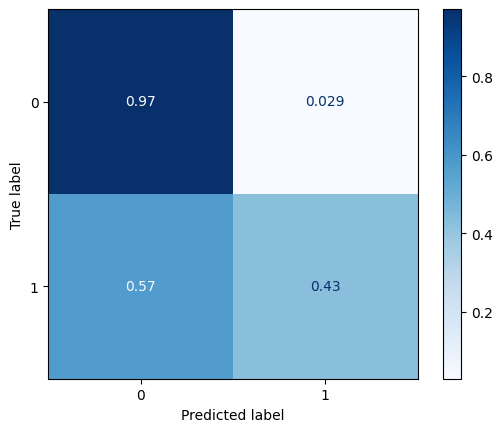

In [23]:
plot_confusion_matrix(model_nom, X=y_feat_nom, y_true=y_target, normalize='true', cmap='Blues')

### OHE Encoding and scaling

Similar with the data we will use for the Random Forest models, we need to encode the data we will use for Logistic Regression models in a specific way: the OHE encoding. 

Using the "pandas" function "get_dummies()" we can take all columns with categoric type value and generate a new columns for each unique value on them, though we can drop one of them with the parameter "drop_first = True" to save memory and processing resources. Each column generated will have zeros and ones stating a true or false value for a specific unique value.

Once done we can see the shape of the dataframe changed due to the OHE encoding.

In [24]:
feat_ohe = pd.get_dummies(features, drop_first=True)

In [25]:
feat_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Same as in the Ordinal Encoding, we have to scale the numeric values for the Logistic Regression models. We will name and split the information the same way as in previous section `(basically the scaling process will be the same for the rest of the project so we will move fast in further scaling sections in the project)`.

In [26]:
x_feat_ohe, yz_feat_ohe = train_test_split(feat_ohe, test_size=0.3, train_size=0.7, random_state=12345)
y_feat_ohe, z_feat_ohe = train_test_split(yz_feat_ohe, train_size=0.66667, random_state=12345)

In [27]:
scaler = StandardScaler()
scaler.fit(x_feat_ohe.loc[:, numerics])

StandardScaler()

In [28]:
x_feat_ohe.loc[:, numerics] = scaler.transform(x_feat_ohe.loc[:, numerics])
y_feat_ohe.loc[:, numerics] = scaler.transform(y_feat_ohe.loc[:, numerics])
z_feat_ohe.loc[:, numerics] = scaler.transform(z_feat_ohe.loc[:, numerics])

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on 

In [29]:
x_feat_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9716,1.658077,0.012853,-0.011409,0.635477,2.527132,1,1,1.480907,1,0,1
224,0.198643,0.584111,0.353260,0.375870,-0.895510,1,1,0.153167,1,0,1
589,-1.374648,0.774530,0.353260,1.302947,0.815811,0,0,0.817773,0,1,0
7507,-0.784664,0.488901,1.447267,0.696496,-0.895510,1,0,0.329403,1,0,1
1457,2.051400,2.583513,-0.376078,-1.222967,0.815811,0,1,-0.617269,0,0,1


Training our Logistic Regression model using "saga" as our solver (following documentation both "sag" and "saga" work faster with large datasets so this solver will be used for the training process) we get the following information:

* Both recall and precision model's scores are lower than Random Forest model's values.
* Model's F1 score is 0.31, 0.34 units below than desired value.
* The model is missing the 78% of positive values.

In [94]:
model_ohe = LogisticRegression(random_state=12345, solver='saga')
model_ohe.fit(x_feat_ohe, x_target)

LogisticRegression(random_state=12345, solver='saga')

In [95]:
pred_ohe = model_ohe.predict(y_feat_ohe)

print(f"The recall score is:    {recall_score(y_target, pred_ohe)}.")
print(f"The precision score is: {precision_score(y_target, pred_ohe)}.")
print(f"The F1 score is:        {f1_score(y_target, pred_ohe)}.")

The recall score is:    0.21601941747572814.
The precision score is: 0.577922077922078.
The F1 score is:        0.31448763250883394.


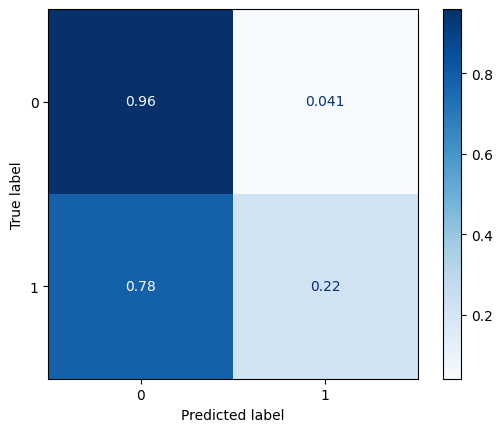

In [96]:
plot_confusion_matrix(model_ohe, X=y_feat_ohe, y_true=y_target, normalize='true', cmap='Blues')

### Conclusions

With the values we have we cannot reach the project's goal. Our models are incorrectly predicting many positive values as false, maybe for a huge difference of the quantity of both values on the dataframe, causing both our precision and recall scores decrease along the F1 value. So we need to apply techniques to improve our predictive models in a way we can increase the F1 values for both models.

To achieve this, in the following sections we will apply different balancing strategies, see how each of those improve the models and the decided if a specific strategy or a combination of them help us increase the F1 values.

## Fixing the unbalance in the sets

When we are working with datasets, there will be situations where the target variable in the set has one or various unique values will be repeated more than other values (popular classes and rare classes). This is called "unbalance" and can be solved in different ways, ones more effective than others depending of the case.

The strategies to solve the unbalance that will be used on this project are:
 * class_weight='balanced'
 * Oversampling
 * Undersampling
 * Classification threshold
 
Let's see how each of these strategies improves our models.

### class_weight = 'balanced'

Both Random Forest and Logistic Regression models have a parameter "class_weight" which default value is None, but can be changes using a dictionary or with the value 'balanced'. The way the 'balanced' configuration works is the following:

`The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as " n_samples / ( n_classes * np.bincount(y) ) ".`

This means the 'balanced' configuration will give each of target values a weight to simulate each unique value in target has the same quantity of observations with weight equal 1.

Let's see how this change our results in both models.

#### Case Ordinal Encoding

For the Random Forest Classifier model we can see the following changes:

* The recall score improved from 0.42 to 0.59.
* The precision score droped from 0.79 to 0.66.
* The F1 score improved from 0.55 to 0.62 (0.03 points below the desired value).
* The true positive rate improved from 0.43 to 0.59.
* The true negative rate droped from 0.97 to 0.92.

The changes were overall positive for this model. Nevertheless, this states the 'balanced' configuration is `not enough` for the Random Forest Classifier model.

The recall score is:    0.5922330097087378.
The precision score is: 0.6612466124661247.
The F1 score is:        0.6248399487836107.


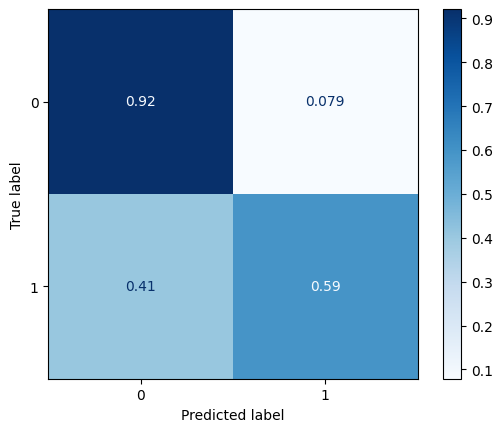

In [33]:
model_nom_bal = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=12345, class_weight='balanced')
model_nom_bal.fit(x_feat_nom, x_target)
pred_nom_bal = model_nom_bal.predict(y_feat_nom)

print(f"The recall score is:    {recall_score(y_target, pred_nom_bal)}.")
print(f"The precision score is: {precision_score(y_target, pred_nom_bal)}.")
print(f"The F1 score is:        {f1_score(y_target, pred_nom_bal)}.")

plot_confusion_matrix(model_nom_bal, X=y_feat_nom, y_true=y_target, normalize='true', cmap='Blues')

#### Case OHE

For the Logistic Regression model we can see many values have changed:

* The recall score improved from 0.21 to 0.71.
* The precision score droped from 0.57 to 0.38.
* The F1 score improved from 0.31 to 0.49 (0.16 points below the desired value).
* The true positive rate improved from 0.22 to 0.71.
* The true negative rate droped from 0.96 to 0.7.

The changes in the Logistic Regression model were more drastical and even though this the F1 score is not enough yet. So we can conclude the 'balanced' configuration is `not enough` for the Logistic Regression model.

The recall score is:    0.7135922330097088.
The precision score is: 0.3843137254901961.
The F1 score is:        0.4995751911639762.


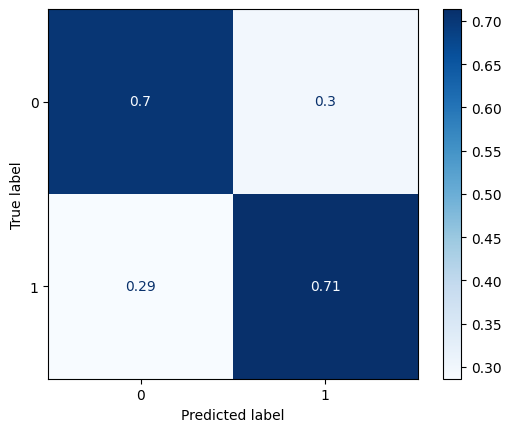

In [98]:
model_ohe_bal = LogisticRegression(random_state=12345, class_weight='balanced')
model_ohe_bal.fit(x_feat_ohe, x_target)
pred_ohe_bal = model_ohe_bal.predict(y_feat_ohe)

print(f"The recall score is:    {recall_score(y_target, pred_ohe_bal)}.")
print(f"The precision score is: {precision_score(y_target, pred_ohe_bal)}.")
print(f"The F1 score is:        {f1_score(y_target, pred_ohe_bal)}.")

plot_confusion_matrix(model_ohe_bal, X=y_feat_ohe, y_true=y_target, normalize='true', cmap='Blues')

### Oversampling

Other way to solve the unbalance in a dataset is to increase the quantity of samples of the rare classes a number of times to increase their class weight. The number of times we can increase our rare values depends on eachone interpretation, but in this case we will try to balance both classes as much as we can.

Let's obtain the relation between both classes and use this information to balance the dataframe.

In [35]:
# Obtaining the quatity of data for each class
print(f"Qty. of not exited customers: {len(target[target == 0])}")
print(f"Qty. of exited customers:     {len(target[target == 1])}")

Qty. of not exited customers: 7963
Qty. of exited customers:     2037


In [36]:
# Obtaining the relation between classes
relation = len(target[target == 0]) / len(target[target == 1])

print(f"Relation between the rare class and the popular class: {relation}")

Relation between the rare class and the popular class: 3.9091801669121256


Once we have the relation between classes, we can create a function to generate oversampled sets. The following function is an example:

In [37]:
def oversampling(features, target, pop, rare, repeat:int) -> tuple:
    
    """
    This function oversamples a features and target sets a number of times equal to 'repeat' depending of the
    popular class 'pop' and the rare class 'rare'.
    
    Input:
        ~features: DataFrame, Series, dict, list
            -Features dict like variable to oversample.
        
        ~target: DataFrame, Series, dict, list
            -Target dict like variable to oversample.
            
        ~pop: int, float, bool, str
            -Popular class.
            
        ~rare: int, float, bool, str
            -Rare class.
            
        ~repeat: int, float
            -Times you want to repeat the rare class (if float will be rounded up).
            
    Output:
        ~features_over: DataFrame, Series, dict, list
            -Oversampled features dict like variable.
            
        ~target_over: DataFrame, Series, dict, list
            -Oversampled target dict like variable.
    """
    
    # Obtaining the features and target sets for popular and rare classes
    features_pop = features[target == pop]
    features_rare = features[target == rare]
    target_pop = target[target == pop]
    target_rare = target[target == rare]
    
    # Generating oversampled features and target sets using the input arguments of functions
    features_over = pd.concat([features_pop] + [features_rare] * math.ceil(repeat))
    target_over = pd.concat([target_pop] + [target_rare] * math.ceil(repeat))
    
    # Shuffling the sets
    features_over, target_over = shuffle(features_over, target_over, random_state=12345)
    
    # Returning oversampled sets
    return features_over, target_over

Creating our oversampled features and target set marking 0 as the popular class and 1 as the rare class and set repeat as the relation we got before, we can see their new shapes and quantity of values for each class.

In [38]:
features_over, target_over = oversampling(features, target, 0, 1, relation)

In [39]:
print(features_over.shape)
print()
print(target_over.shape)

(16111, 10)

(16111,)


In [101]:
print(len(target_over[target_over == 0]))
print(len(features_over[target_over == 0]))
print()
print(len(target_over[target_over == 1]))
print(len(features_over[target_over == 1]))

7963
7963

8148
8148


#### Case Ordinal Encoding

We follow the same encoding, splitting and scaling as in section 3.3 and continue.

In [41]:
feat_over_nom = pd.DataFrame(encoder.fit_transform(features_over[categorics]), columns=features_over[categorics].columns)
feat_over_nom = pd.concat([feat_over_nom, features_over[numerics].reset_index(drop=True)], axis=1)

In [42]:
x_feat_over_nom, yz_feat_over_nom, x_target_over, yz_target_over = train_test_split(feat_over_nom, target_over, test_size=0.3, train_size=0.7, random_state=12345)
y_feat_over_nom, z_feat_over_nom, y_target_over, z_target_over = train_test_split(yz_feat_over_nom, yz_target_over, train_size=0.66667, random_state=12345)

In [43]:
scaler.fit(x_feat_over_nom.loc[:, numerics])

x_feat_over_nom.loc[:, numerics] = scaler.transform(x_feat_over_nom.loc[:, numerics])
y_feat_over_nom.loc[:, numerics] = scaler.transform(y_feat_over_nom.loc[:, numerics])
z_feat_over_nom.loc[:, numerics] = scaler.transform(z_feat_over_nom.loc[:, numerics])

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on 

Verify our information was correctly processed and continue.

In [44]:
x_feat_over_nom.head()

,geography,gender,has_cr_card,is_active_member,credit_score,age,tenure,balance,num_of_products,estimated_salary
4334,0.0,1.0,1.0,0.0,-1.516965,1.409519,-1.426905,0.303912,-0.761054,0.311653
10993,2.0,1.0,1.0,1.0,-0.945493,0.462246,-0.704370,0.815636,-0.761054,0.138526
3735,1.0,0.0,0.0,0.0,-0.251563,1.030610,-1.788172,0.847563,-0.761054,-1.657549
365,1.0,1.0,1.0,1.0,0.115812,-0.958664,1.463233,0.708447,0.716887,0.682226
5698,0.0,1.0,1.0,0.0,-0.414841,-0.769209,1.463233,0.134276,-0.761054,-0.549871


For the Random Forest Classifier model we can see the following changes:

* The recall score improved from 0.42 to 0.88.
* The precision score improved from 0.79 to 0.86.
* The F1 score improved from 0.55 to 0.87 (0.22 points above the desired value).
* The true positive rate improved from 0.43 to 0.89.
* The true negative rate droped from 0.97 to 0.86.

The changes were overall positive for this model. `The oversampling was enough` to reach the desired F1 value, but let's continue with our research.

The recall score is:    0.8854731766124171.
The precision score is: 0.8692307692307693.
The F1 score is:        0.877276799044491.


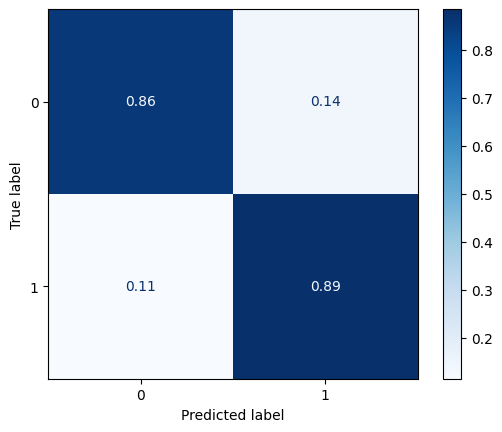

In [45]:
model_nom.fit(x_feat_over_nom, x_target_over)
pred_over_nom = model_nom.predict(y_feat_over_nom)

print(f"The recall score is:    {recall_score(y_target_over, pred_over_nom)}.")
print(f"The precision score is: {precision_score(y_target_over, pred_over_nom)}.")
print(f"The F1 score is:        {f1_score(y_target_over, pred_over_nom)}.")

plot_confusion_matrix(model_nom, X=y_feat_over_nom, y_true=y_target_over, normalize='true', cmap='Blues')

#### Case OHE

We apply the same encoding, splitting and scaling as in section 3.4 and continue.

In [46]:
feat_over_ohe = pd.get_dummies(features_over, drop_first=True)

x_feat_over_ohe, yz_feat_over_ohe = train_test_split(feat_over_ohe, test_size=0.3, train_size=0.7, random_state=12345)
y_feat_over_ohe, z_feat_over_ohe = train_test_split(yz_feat_over_ohe, train_size=0.66667, random_state=12345)

scaler.fit(x_feat_over_ohe.loc[:, numerics])
x_feat_over_ohe.loc[:, numerics] = scaler.transform(x_feat_over_ohe.loc[:, numerics])
y_feat_over_ohe.loc[:, numerics] = scaler.transform(y_feat_over_ohe.loc[:, numerics])
z_feat_over_ohe.loc[:, numerics] = scaler.transform(z_feat_over_ohe.loc[:, numerics])

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on 

Varify our information was correctly processed and continue.

In [47]:
x_feat_over_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
1653,-1.516965,1.409519,-1.426905,0.303912,-0.761054,1,0,0.311653,0,0,1
8876,-0.945493,0.462246,-0.704370,0.815636,-0.761054,1,1,0.138526,0,1,1
9206,-0.251563,1.030610,-1.788172,0.847563,-0.761054,0,0,-1.657549,1,0,0
165,0.115812,-0.958664,1.463233,0.708447,0.716887,1,1,0.682226,1,0,1
465,-0.414841,-0.769209,1.463233,0.134276,-0.761054,1,0,-0.549871,0,0,1


For the Logistic Regression model we can see the following changes:

* The recall score improved from 0.21 to 0.70.
* The precision score improved from 0.57 to 0.72.
* The F1 score improved from 0.31 to 0.71 (0.06 points above the desired value).
* The true positive rate improved from 0.22 to 0.71.
* The true negative rate droped from 0.96 to 0.71.

The changes were mainly positive for this model. `The oversampling was enough` to reach the desired F1 value, but let's continue with our research.

The recall score is:    0.707655213984328.
The precision score is: 0.7242442936458976.
The F1 score is:        0.7158536585365856.


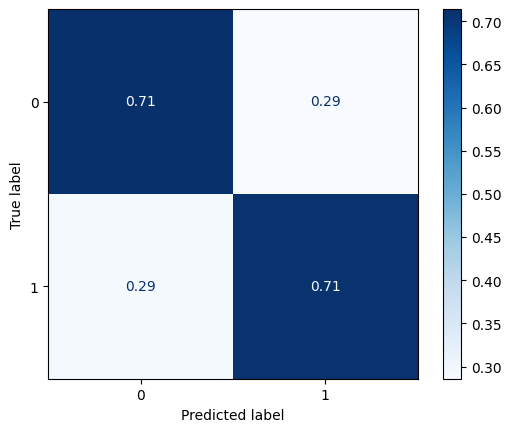

In [48]:
model_ohe.fit(x_feat_over_ohe, x_target_over)
pred_over_ohe = model_ohe.predict(y_feat_over_ohe)

print(f"The recall score is:    {recall_score(y_target_over, pred_over_ohe)}.")
print(f"The precision score is: {precision_score(y_target_over, pred_over_ohe)}.")
print(f"The F1 score is:        {f1_score(y_target_over, pred_over_ohe)}.")

plot_confusion_matrix(model_ohe, X=y_feat_over_ohe, y_true=y_target_over, normalize='true', cmap='Blues')

### Undersampling

A third way to solve the unbalance in a dataset is to decrease the quantity of samples of the popular classes a number of times to decrease their class weight. The number of times we can decrease the popular values depends on each one interpretation, but in this case we will try to balance both classes as much as we can using the inverse of the relation we got on section 4.2.

This is the inverse of oversampling but works similar. Let's create a new function we can use to generate new sets applying this method using our features and target sets.

In [49]:
def undersampling(features, target, pop, rare, repeat):
    
    """
    This function undersamples a features and target sets a number of times equal to 'repeat' depending of the
    popular class 'pop' and the rare class 'rare'.
    
    Input:
        ~features: DataFrame, Series, dict, list
            -Features dict like variable to undersample.
        
        ~target: DataFrame, Series, dict, list
            -Target dict like variable to undersample.
            
        ~pop: int, float, bool, str
            -Popular class.
            
        ~rare: int, float, bool, str
            -Rare class.
            
        ~repeat: int, float
            -Times you want to fractionate the popular class.
            
    Output:
        ~features_over: DataFrame, Series, dict, list
            -Undersampled features dict like variable.
            
        ~target_over: DataFrame, Series, dict, list
            -Undersampled target dict like variable.
    """
    
    # Obtaining the features and target sets for popular and rare classes
    features_pop = features[target == pop]
    features_rare = features[target == rare]
    target_pop = target[target == pop]
    target_rare = target[target == rare]
    
    # Generating undersampled features and target sets using the input arguments of functions
    features_under = pd.concat([features_pop.sample(frac=(1/relation), random_state=12345)] + [features_rare])
    target_under = pd.concat([target_pop.sample(frac=(1/relation), random_state=12345)] + [target_rare])
    
    # Shuffling the sets
    features_under, target_under = shuffle(features_under, target_under, random_state=12345)
    
    # Returning undersampled sets
    return features_under, target_under

With this new function created we can now generate our new undersampled set and see show its shape and quantity of each class value has changed.

In [50]:
features_under, target_under = undersampling(features, target, 0, 1, relation)

In [51]:
print(features_under.shape)
print()
print(target_under.shape)

(4074, 10)

(4074,)


In [102]:
print(len(features_under[target_under == 0]))
print(len(target_under[target_under == 0]))
print()
print(len(features_under[target_under == 1]))
print(len(target_under[target_under == 1]))

2037
2037

2037
2037


#### Case Ordinal Encoding

We follow the same encoding, splitting and scaling as in section 3.3 and continue.

In [53]:
feat_under_nom = pd.DataFrame(encoder.fit_transform(features_under[categorics]), columns=features_under[categorics].columns)
feat_under_nom = pd.concat([feat_under_nom, features_under[numerics].reset_index(drop=True)], axis=1)

In [54]:
x_feat_under_nom, yz_feat_under_nom, x_target_under, yz_target_under = train_test_split(feat_under_nom, target_under, test_size=0.3, train_size=0.7, random_state=12345)
y_feat_under_nom, z_feat_under_nom, y_target_under, z_target_under = train_test_split(yz_feat_under_nom, yz_target_under, train_size=0.66667, random_state=12345)

In [55]:
scaler.fit(x_feat_under_nom.loc[:, numerics])

x_feat_under_nom.loc[:, numerics] = scaler.transform(x_feat_under_nom.loc[:, numerics])
y_feat_under_nom.loc[:, numerics] = scaler.transform(y_feat_under_nom.loc[:, numerics])
z_feat_under_nom.loc[:, numerics] = scaler.transform(z_feat_under_nom.loc[:, numerics])

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on 

Verify our information was correctly processed and continue.

In [56]:
x_feat_under_nom.head()

,geography,gender,has_cr_card,is_active_member,credit_score,age,tenure,balance,num_of_products,estimated_salary
2754,1.0,0.0,0.0,0.0,0.563543,2.155168,-0.700035,1.183672,2.22828,0.793269
723,0.0,1.0,1.0,0.0,-1.196813,-0.200952,-1.055223,-1.315792,0.72643,1.687653
2147,2.0,0.0,1.0,0.0,-0.382019,-0.389442,-0.344847,-1.315792,0.72643,0.429634
287,0.0,0.0,1.0,0.0,-0.824623,-0.012462,1.431091,0.929964,-0.77542,0.713771
1816,1.0,0.0,1.0,0.0,0.573602,0.458762,-0.344847,0.397776,-0.77542,0.133592


For the Random Forest Classifier model we can see the following changes:

* The recall score improved from 0.42 to 0.72.
* The precision score stayed the with 0.79.
* The F1 score improved from 0.55 to 0.75 (0.1 points above the desired value).
* The true positive rate improved from 0.43 to 0.72.
* The true negative rate droped from 0.97 to 0.81.

The changes were mainly positive for this model. `The undersampling was enough` to reach the desired F1 value, but let's continue with our research.

The recall score is:    0.7215496368038741.
The precision score is: 0.7989276139410187.
The F1 score is:        0.7582697201017812.


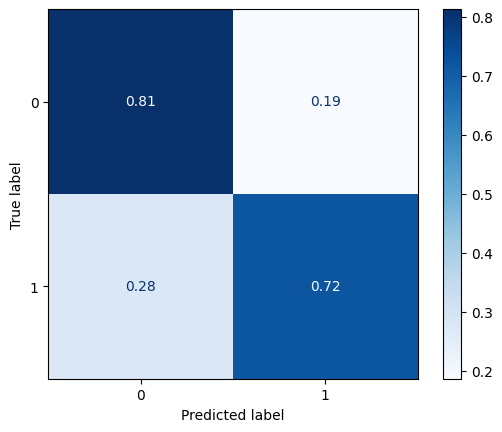

In [57]:
model_nom.fit(x_feat_under_nom, x_target_under)
pred_under_nom = model_nom.predict(y_feat_under_nom)

print(f"The recall score is:    {recall_score(y_target_under, pred_under_nom)}.")
print(f"The precision score is: {precision_score(y_target_under, pred_under_nom)}.")
print(f"The F1 score is:        {f1_score(y_target_under, pred_under_nom)}.")

plot_confusion_matrix(model_nom, X=y_feat_under_nom, y_true=y_target_under, normalize='true', cmap='Blues')

#### Case OHE

We follow the same encoding, splitting and scaling as in section 3.4 and continue.

In [58]:
feat_under_ohe = pd.get_dummies(features_under, drop_first=True)

x_feat_under_ohe, yz_feat_under_ohe = train_test_split(feat_under_ohe, test_size=0.3, train_size=0.7, random_state=12345)
y_feat_under_ohe, z_feat_under_ohe = train_test_split(yz_feat_under_ohe, train_size=0.66667, random_state=12345)

scaler.fit(x_feat_under_ohe.loc[:, numerics])
x_feat_under_ohe.loc[:, numerics] = scaler.transform(x_feat_under_ohe.loc[:, numerics])
y_feat_under_ohe.loc[:, numerics] = scaler.transform(y_feat_under_ohe.loc[:, numerics])
z_feat_under_ohe.loc[:, numerics] = scaler.transform(z_feat_under_ohe.loc[:, numerics])

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on 

Verify our information was correctly processed and continue.

In [59]:
x_feat_under_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
4563,0.563543,2.155168,-0.700035,1.183672,2.22828,0,0,0.793269,1,0,0
3867,-1.196813,-0.200952,-1.055223,-1.315792,0.72643,1,0,1.687653,0,0,1
407,-0.382019,-0.389442,-0.344847,-1.315792,0.72643,1,0,0.429634,0,1,0
8453,-0.824623,-0.012462,1.431091,0.929964,-0.77542,1,0,0.713771,0,0,0
4597,0.573602,0.458762,-0.344847,0.397776,-0.77542,1,0,0.133592,1,0,0


For the Logistic Regression model we can see the following changes:

* The recall score improved from 0.21 to 0.65.
* The precision score improved from 0.57 to 0.7.
* The F1 score improved from 0.31 to 0.67 (0.02 points above the desired value).
* The true positive rate improved from 0.22 to 0.66.
* The true negative rate droped from 0.96 to 0.71.

The changes were mainly positive for this model. `The oversampling was enough` to reach the desired F1 value, but let's continue with our research.

The recall score is:    0.6585956416464891.
The precision score is: 0.7010309278350515.
The F1 score is:        0.6791510611735331.


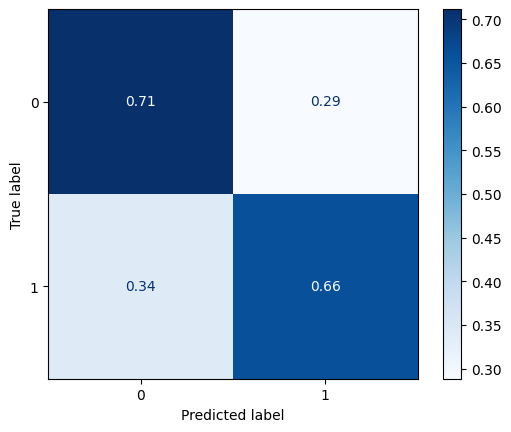

In [60]:
model_ohe.fit(x_feat_under_ohe, x_target_under)
pred_under_ohe = model_ohe.predict(y_feat_under_ohe)

print(f"The recall score is:    {recall_score(y_target_under, pred_under_ohe)}.")
print(f"The precision score is: {precision_score(y_target_under, pred_under_ohe)}.")
print(f"The F1 score is:        {f1_score(y_target_under, pred_under_ohe)}.")

plot_confusion_matrix(model_ohe, X=y_feat_under_ohe, y_true=y_target_under, normalize='true', cmap='Blues')

### Adjusting the Classification Threshold

The final way to get through unbalance we will see in this project is adjusting the classification threshold. This means to adjust the probability value in which our model identifies as true positives the predicted values we got. In our case we have 2 possible values 0 and 1 which means is 50% probable to get any of those values, now we can adjust this to be lower or higher for our possitive class (1) and improve our F1 score.

The way we will make this possible is to obtain the probabilities for a row in our dataframe to be 0 or 1 and the filter the "ones list" using our threshold value. Then we can get the information we need.

Let's see how this helps us improve our F1 value.

#### Case Ordinal Encoding

Using the features and target sets we generated in section 3.3 we can iterate over various possible "best threshold" values, but first we need to obatin the probabilities using the function "predict_proba()" and then filtering the postives column.

Let's see the process.

In [131]:
# Tarining the model
model_nom.fit(x_feat_nom, x_target)

# Getting the probabilities using our validation set
prob_valid_nom = model_nom.predict_proba(y_feat_nom)

# Getting the list os probabilities for the positives column
prob_one_valid_nom = prob_valid_nom[:, 1]

In [132]:
# Variables to save the best configuration threshold and interes information
best_thr_nom = 0
best_rec_nom = 0
best_pre_nom = 0
best_f1_nom = 0

In [133]:
# Iterative process to get the best threshold value
for threshold in np.arange(0, 1, 0.01):
    predicted_valid_nom = prob_one_valid_nom > threshold
    rec_nom = recall_score(predicted_valid_nom, y_target)
    pre_nom = precision_score(predicted_valid_nom, y_target)
    f1_nom = f1_score(predicted_valid_nom, y_target)
    
    # Save new values if current F1 score is higher than saved F1 score
    if f1_nom > best_f1_nom:
        best_thr_nom = threshold
        best_rec_nom = rec_nom
        best_pre_nom = pre_nom
        best_f1_nom = f1_nom

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iterating over possibles "best threshold" values we can see the best value is 0.29. This means our model shall identify better the true possitives with new value with a F1 score of 0.62 (0.03 below the desired value).

In [134]:
print(f"The best threshold value is {best_thr_nom} and its values are: recall = {best_rec_nom}; precision = {best_pre_nom}; F1 = {best_f1_nom}.")

The best threshold value is 0.29 and its values are: recall = 0.6004415011037527; precision = 0.6601941747572816; F1 = 0.6289017341040462.


To comprehend how the configuration of the threshold affects our relation precision-recall (therefore the F1 score) we can use the function "precision_recall_curve" to get all the needed values tu plot it on a step plot. We also added two lines marking the precision (orange line) and recall (green line) values obtained for out "best threshold" value.

We can see by the step plot the more the recall increases the less precision the model has.

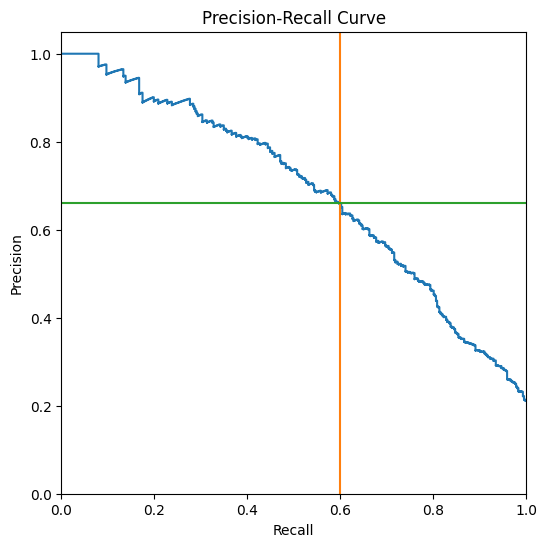

In [135]:
precision_nom, recall_nom, threshold_nom = precision_recall_curve(y_target, prob_one_valid_nom)

plt.figure(figsize=(6, 6))
plt.step(recall_nom, precision_nom, where='post')
plt.plot([best_rec_nom, best_rec_nom], [0, 1.05])
plt.plot([0, 1], [best_pre_nom, best_pre_nom])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

Now we can plot a ROC curve and obtain the are under it (AUC-ROC) to see how our true positives rate and false positives rate (tpr and fpr) behaves with a variation on the threshold.

Also if we plot a confusion matrix on the set we can get the values of the tpr and fpr and plot those values as lines to visualize an interesting point in the ROC curve. At the moment we do not know if it is coincidence or not, but is interesting stand out this point.

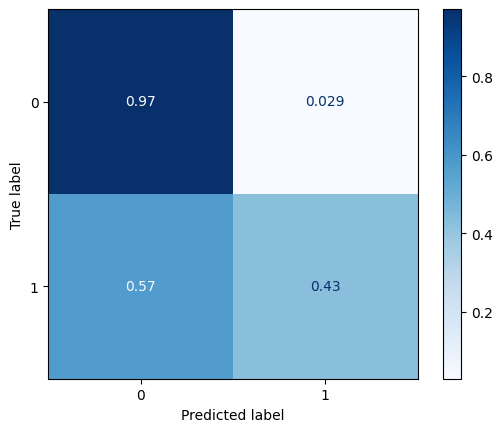

In [151]:
plot_confusion_matrix(model_nom, X=y_feat_nom, y_true=y_target, normalize='true', cmap='Blues')
plt.show()

The ROC=AUC is: 0.8533861363136143.


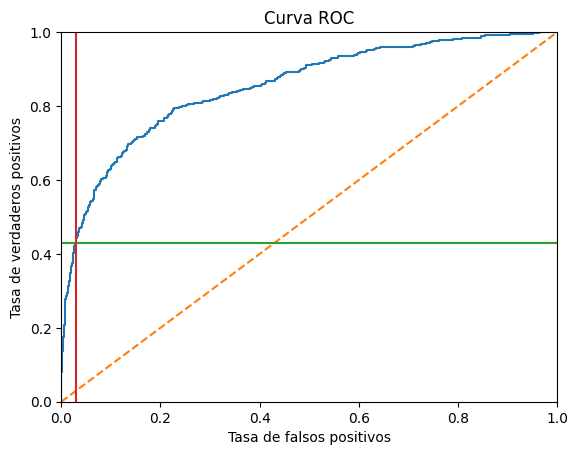

In [153]:
fpr, tpr, thresholds = roc_curve(y_target, prob_one_valid_nom)
auc_nom = roc_auc_score(y_target, prob_one_valid_nom)
print(f"The ROC=AUC is: {auc_nom}.")

plt.figure()

# Plotting the points for fpr and tpr
plt.plot(fpr, tpr)

# Reference ROC curve for 0.5 AUC-ROC and lines of the intersection
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0, 1.0], [0.43, 0.43])
plt.plot([0.029, 0.029], [0, 1.0])

# Set limits from 0 to 1 for x-axis and y-axis
plt.xlim([0, 1])
plt.ylim([0, 1])

# Changing axles labels
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Adding a title to the plot
plt.title("Curva ROC")

plt.show()

Plotting a new confusion matrix using the predicted data with the threshold applied, we can see the model can predict 100% of the negative class values as true negatives but only a 49% of the positive class values as true positives.

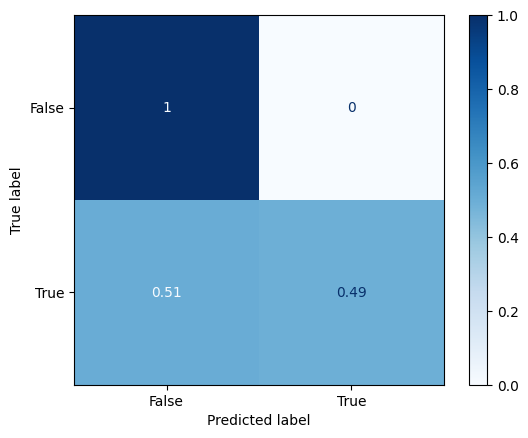

In [156]:
plot_confusion_matrix(model_nom, X=y_feat_nom, y_true=prob_one_valid_nom > best_thr_nom, normalize='true', cmap='Blues')
plt.show()

With all the coding above we can conclude the following:

* Our best F1 score is 0.6289017341040462 (aprox. 0.021 points below desired value) with a threshold of 0.29.
* Our best recall-precision relation is in recall = 0.6004415011037527 and precision = 0.6601941747572816.
* Our AUC-ROC is 0.8533861363136143.
* Our interest point in the ROC plot is in tpr = 0.43 and fpr = 0.029.

#### Case OHE

Same as in section 4.4.1 we apply the same threshold processing to the OHE processed data.

In [142]:
model_ohe.fit(x_feat_ohe, x_target)
prob_valid_ohe = model_ohe.predict_proba(y_feat_ohe)
prob_one_valid_ohe = prob_valid_ohe[:, 1]

In [144]:
best_thr_ohe = 0
best_rec_ohe = 0
best_pre_ohe = 0
best_f1_ohe = 0

In [145]:
for threshold in np.arange(0, 1, 0.01):
    predicted_valid_ohe = prob_one_valid_ohe > threshold
    rec_ohe = recall_score(predicted_valid_ohe, y_target)
    pre_ohe = precision_score(predicted_valid_ohe, y_target)
    f1_ohe = f1_score(predicted_valid_ohe, y_target)
    
    if f1_ohe > best_f1_ohe:
        best_thr_ohe = threshold
        best_rec_ohe = rec_ohe
        best_pre_ohe = pre_ohe
        best_f1_ohe = f1_ohe

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning

In [146]:
print(f"The best threshold value is {best_thr_ohe} and its values are: recall = {best_rec_ohe}; precision = {best_pre_ohe}; F1 = {best_f1_ohe}.")

The best threshold value is 0.25 and its values are: recall = 0.4219001610305958; precision = 0.6359223300970874; F1 = 0.5072604065827687.


Plotting a new precision-recall curve we can see the behaviour of this new curve has less variance compared with the one of previous section, but still has a tendecy to drop the recall score the more the precision scores increases.

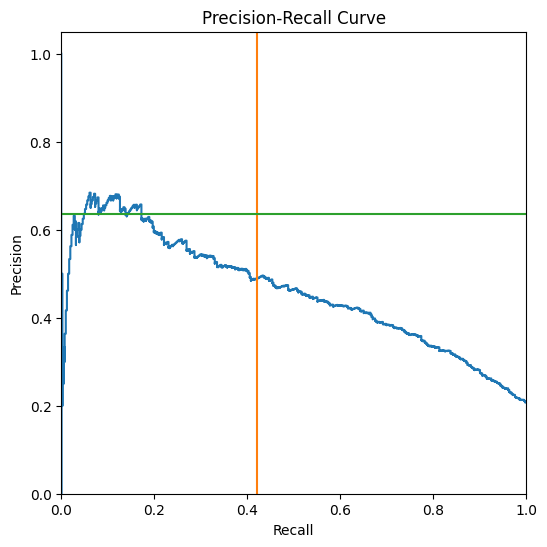

In [147]:
precision_ohe, recall_ohe, threshold_ohe = precision_recall_curve(y_target, prob_one_valid_ohe)

plt.figure(figsize=(6, 6))
plt.step(recall_ohe, precision_ohe, where='post')
plt.plot([best_rec_ohe, best_rec_ohe], [0, 1.05])
plt.plot([0, 1], [best_pre_ohe, best_pre_ohe])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

Plotting a new ROC curve with the OHE set we can see its quite different from the curve generated with the Nominal Encoded set, as this new curve has a form similar tu a curve.

It also has the singularity that if you plot as lines the tpr and the fpr both intersects in a point in the curve.

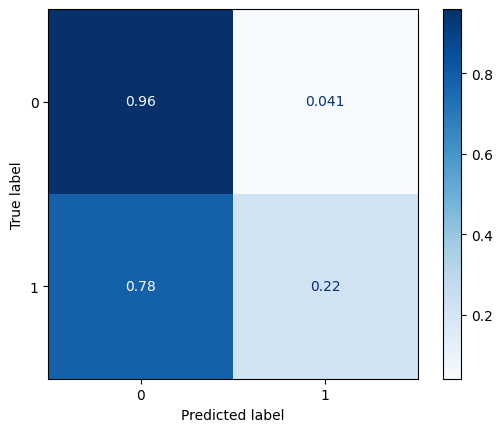

In [149]:
plot_confusion_matrix(model_ohe, X=y_feat_ohe, y_true=y_target, normalize='true', cmap='Blues')
plt.show()

The ROC=AUC is: 0.7665546819593554.


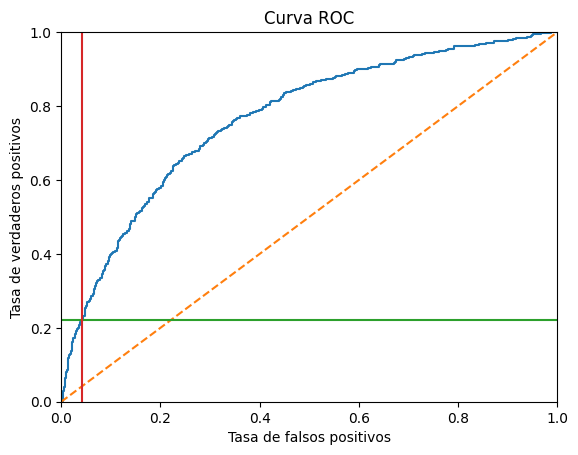

In [157]:
fpr, tpr, thresholds = roc_curve(y_target, prob_one_valid_ohe)
auc_ohe = roc_auc_score(y_target, prob_one_valid_ohe)
print(f"The ROC=AUC is: {auc_ohe}.")

plt.figure()

# Plotting the points for fpr and tpr
plt.plot(fpr, tpr)

# Reference ROC curve for 0.5 AUC-ROC and lines of the intersection
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0, 1.0], [0.22, 0.22])
plt.plot([0.041, 0.041], [0, 1.0])

# Set limits from 0 to 1 for x-axis and y-axis
plt.xlim([0, 1])
plt.ylim([0, 1])

# Changing axles labels
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Adding a title to the plot
plt.title("Curva ROC")

plt.show()

Plotting a new confusion matrix using the predicted data with the threshold applied, we can see the model can predict 100% of the negative class values as true negatives but only a 25% of the positive class values as true positives.

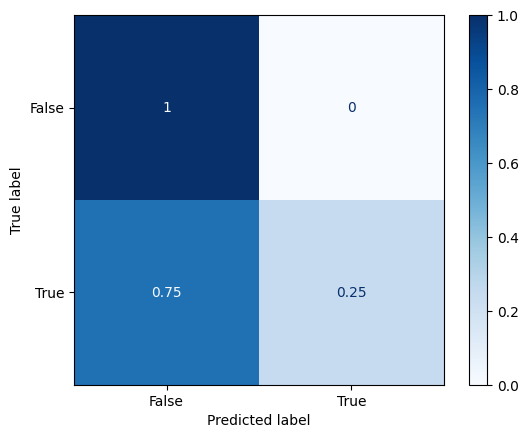

In [159]:
plot_confusion_matrix(model_ohe, X=y_feat_ohe, y_true=prob_one_valid_ohe > best_thr_ohe, normalize='true', cmap='Blues')
plt.show()

With all the coding above we can conclude the following:

* Our best F1 score is 0.0.5072604065827687 (aprox. 0.15 points below desired value) with a threshold of 0.25.
* Our best recall-precision relation is in recall = 0.4219001610305958 and precision = 0.6359223300970874.
* Our AUC-ROC is 0.7665546819593554.
* Our interest point in the ROC plot is in tpr = 0.22 and fpr = 0.041.

### Summary of tests

Let's remember the results obtained from both models on all the balancing methods we applied:

* class_weight='balance'


    * Ordinal Encoding
        * The recall score is:    0.5922330097087378.
        * The precision score is: 0.6612466124661247.
        * The F1 score is:        0.6248399487836107.
        
    * OHE
        * The recall score is:    0.7135922330097088.
        * The precision score is: 0.3843137254901961.
        * The F1 score is:        0.4995751911639762.
            
* Oversampling


    * Ordinal Encoding
        * The recall score is:    0.8854731766124171.
        * The precision score is: 0.8692307692307693.
        * The F1 score is:        0.877276799044491.
            
    * OHE
        * The recall score is:    0.707655213984328.
        * The precision score is: 0.7242442936458976.
        * The F1 score is:        0.7158536585365856.
        
* Undersampling


    * Ordinal Encoding
        * The recall score is:    0.7215496368038741.
        * The precision score is: 0.7989276139410187.
        * The F1 score is:        0.7582697201017812.
            
    * OHE
        * The recall score is:    0.6585956416464891.
        * The precision score is: 0.7010309278350515.
        * The F1 score is:        0.6791510611735331.
        
* Classification Threshold


    * Ordinal Encoding
        * The recall score is:    0.6004415011037527.
        * The precision score is: 0.6601941747572816.
        * The F1 score is:        0.6289017341040462.
        * Threshold:              0.29.
            
    * OHE
        * The recall score is:    0.4219001610305958.
        * The precision score is: 0.6359223300970874.
        * The F1 score is:        0.5072604065827687.
        * Threshold:              0.25.
        
We can see the Ordinal Encoded models (Random Forest Classifier models) have higuer results in contrast of the OHE encoded models (Logistical Regression models), so we will use the Random Forest model for the final steps of the project.

Also, in all the balancing processing of the Random Forest model we could see the oversampling returned us higuer results than the undersampling. Our final combination of balancing for the final Random Forest model will be: `class_weight='balanced'` + `oversampling` + `threshold classification`.

#### Using a new RandomForestClassifier model

As we said earlier, our selected balancing processing will be: `balanced configuration` + `oversampling` + `classification threshold`. Let's apply all of them together on the same Random Forest model we were using all the project.

In this block we use the Random Forest model with the parameter class_weight='balanced' to train the oversampled training set and then to obtain the best threshold value evaluating F1 score obtained in the iteration (also saving the precision and recall scores).

In [76]:
best_thr_nom_test = 0
best_rec_nom_test = 0
best_pre_nom_test = 0
best_f1_nom_test = 0

model_nom_bal.fit(x_feat_over_nom, x_target_over)
pred_test = model_nom_bal.predict_proba(y_feat_over_nom)
prob_one_valid_nom_test = pred_test[:, 1]

for threshold in np.arange(0, 1, 0.01):
    predicted_valid_nom_test = prob_one_valid_nom_test > threshold
    rec_nom_test = recall_score(predicted_valid_nom_test, y_target_over)
    pre_nom_test = precision_score(predicted_valid_nom_test, y_target_over)
    f1_nom_test = f1_score(predicted_valid_nom_test, y_target_over)
    
    if f1_nom_test > best_f1_nom_test:
        best_thr_nom_test = threshold
        best_rec_nom_test = rec_nom_test
        best_pre_nom_test = pre_nom_test
        best_f1_nom_test = f1_nom_test

Now knowing the results we can print it in a way all people can comprehend the information obtained.

In [77]:
print(f"The best threshold value is {best_thr_nom_test} and its values are: recall = {best_rec_nom_test}; precision = {best_pre_nom_test}; F1 = {best_f1_nom_test}.")

The best threshold value is 0.48 and its values are: recall = 0.8610478359908884; precision = 0.9113924050632911; F1 = 0.8855051244509516.


Plotting a new precision-recall curve we can see our results mark the following:

* The precision score is 0.9113924050632911 (green line).
* The recall score is 0.8610478359908884 (orange line).
* The F1 score is 0.8855051244509516.

The precision-recall curve has improved drastically from previous curves indicating our balancing process has been succesful.

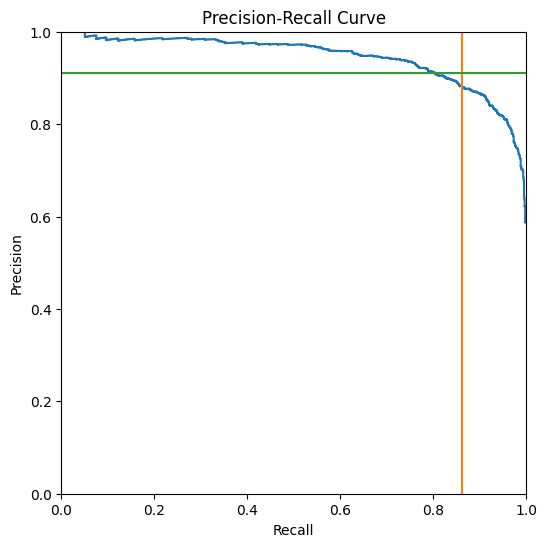

In [168]:
precision_nom_test, recall_nom_test, threshold_nom_test = precision_recall_curve(y_target_over, prob_one_valid_nom_test)

plt.figure(figsize=(6, 6))
plt.step(recall_nom_test, precision_nom_test, where='post')
plt.plot([best_rec_nom_test, best_rec_nom_test], [0, 1.0])
plt.plot([0, 1], [best_pre_nom_test, best_pre_nom_test])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

With a new confusion matrix we can see a minimum improvement from past models because the true negatives rate has improved from 0.97 to 0.99 and the true positives rate staying on 0.43, so we can conclude as minimal it gets is an improvement.

With this is hand we can plot a new ROC curve and obtain the new AUC-ROC value.

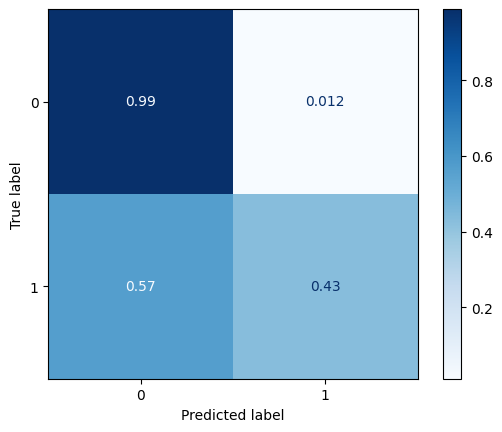

In [163]:
plot_confusion_matrix(model_nom, X=y_feat_over_nom, y_true=y_target_over, normalize='true', cmap='Blues')
plt.show()

The AUC-ROC value is: 0.9471129576088394.


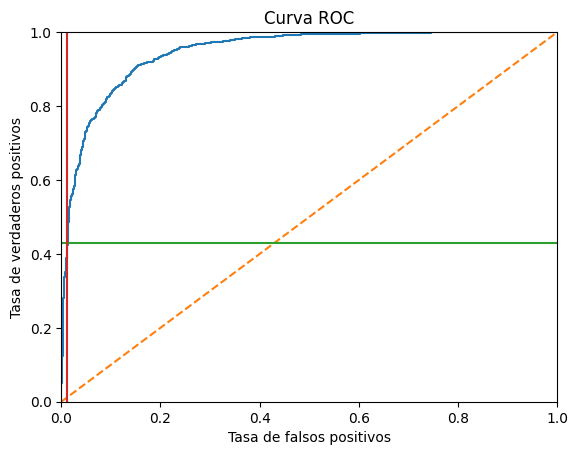

In [165]:
fpr, tpr, thresholds = roc_curve(y_target_over, prob_one_valid_nom_test)
auc_nom_test = roc_auc_score(y_target_over, prob_one_valid_nom_test)
print(f"The AUC-ROC value is: {auc_nom_test}.")

plt.figure()

# Plotting the points for fpr and tpr
plt.plot(fpr, tpr)

# Reference ROC curve for 0.5 AUC-ROC and lines of the intersection
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0, 1.0], [0.43, 0.43])
plt.plot([0.012, 0.012], [0, 1.0])

# Set limits from 0 to 1 for x-axis and y-axis
plt.xlim([0, 1])
plt.ylim([0, 1])

# Changing axles labels
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Adding a title to the plot
plt.title("Curva ROC")

plt.show()

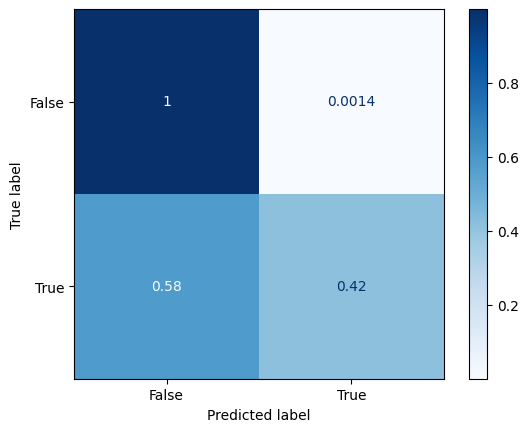

In [166]:
plot_confusion_matrix(model_nom, X=y_feat_over_nom, y_true=prob_one_valid_nom_test > best_thr_nom_test, normalize='true', cmap='Blues')
plt.show()

Using the new confusion matrix and ROC plots we can conclude the following:

* Our AUC-ROC is 0.0.9471129576088394.
* Our interest point in the ROC plot is in tpr = 0.43 and fpr = 0.012.
* Our new confusion matrix plot states we can predict almost the 100% of true negatives as negatives, but only the 42% of true positives as positives.

### Conclusions

1.- We could see the Random Forest models had better results after balancing processing compared to the Logistic Regression models.

2.- The oversampling has better results compared to the undersampling (maybe because the more information you have the better for the algorithms).

3.- Once we applied more than one balancing processing to the model we could see a drastical improvement on the Random Forest model and also an improvement on the F1 score.

4.- Eventhough we do not have yet a model which can predict most of true positives as positives, we are still left to find the best Random Forest model hyperparameters configuration. This means we still have oportunities to improve our model.

## Designing the final model

Now we have a better idea of how our preditive model shall be. We have decided to be a Random Forest Classifier model with 3 types of balancing processing on it, but we still need to find the best hyperparameters configuration for the model.

We will use a previous function we used on Sprint 8 project with a few changes to fit the new balancing process we learned on sprint 9 and find the best configuration for our model.

`-----------------------------------------------------WARNING------------------------------------------------------------------`

Due to the iterative process of the function, we recommend runing this function by caution because we have estimated `the processing time of this function is around 29 minutes`. We saved the values we got on new variables on following blocks (section 5.1) so you do not have to run it again, nevertheless if you want to try another configuration you are free to.

`-----------------------------------------------------WARNING------------------------------------------------------------------`

In [81]:
def rfc_Chooser(training_features, training_target, validation_features, validation_target, in_estimators=100, in_split=2, in_leaf=1, in_depth=None, weight='balanced'):
    
    """
    This function takes as inputs 2 sets of data (the validation and the training sets), and gets the accuracy score
    for the information on those sets using a Random Forest Classifier model. You can also specify a new value 
    for the following parameters:
    
    n_estimators, min_samples_split, min_samples_leaf & max_depth.
    
    to iterate over them in the model if you want to use values different from the default parameters.
    
    Inputs:
    -training_features: DataFrame or Series
        ~ The feature(s) values for the training set.
    -training_target: DataFrame or Series
        ~ The target(s) values for the training set.
    -validation_features: DataFrame or Series
        ~ The feature(s) values for the validation set.
    -validation_target: DataFrame or Series
        ~ The target(s) values for the validation set.
    -in_estimators: int
        ~ Maximum value for the n_estimators parameter.
    -in_split: int or float
        ~ Maximum value for the min_samples_split parameter.
    -in_leaf: int or float
        ~ Maximum value for the min_samples_leaf parameter.
    -in_depth: None or int
        ~ Maximum value for the max_depth parameter.
    -weight: str
        ~ Class weight for the model model. Balanced by default.
        
    Outputs:
    -best_split_rfc: int or float
        ~ The most optimal value for the min_samples_split parameter.
    -best_leaf_rfc: int or float
        ~ The most optimal value for the min_samples_leaf parameter.
    -best_depth_rfc: None or int
        ~ The most optimal value for the max_depth parameter.
    -best_est_rfc: int
        ~ The most optimal value for the max_depth parameter.
    -best_f1_rfc: float
        ~ The best F1 value obtained in the iteration.
    -best_threshold_rfc: float
        ~ The best threshold value obtained in the iteration.
    """
    
    # Evaluations for incorrect inputs
    if len(training_features) != len(training_target):
        return "Error. Training sets do not have the same lenght."
        
    if len(validation_features) != len(validation_target):
        return "Error. Test sets do not have the same lenght."
    
    if in_estimators < 1:
        return "Error. Number of estimators value is less than 1."
    
    if in_estimators % 1 != 0:
        return "Error. Number of estimators value is less than 0."
        
    if in_split < 0:
        return "Error. Minimum samples split value is less than 0."
        
    if in_leaf < 0:
        return "Error. Minimum samples leaf value is less than 0."
        
    if in_depth % 1 != 0:
        return "Error. Max depth value is a float number."
    
    if in_depth < 0:
        return "Error. Max depth value is less than 0."
    
    # Local variables for the parameters for the best accuracy in the evaluation
    best_threshold_rfc = 0.0
    best_split_rfc = 0.0
    best_leaf_rfc = 0.0
    best_depth_rfc = 0.0
    best_est_rfc = 0.0
    best_f1_rfc = 0.0
    
    # Getting the value for min_samples_split variable in case our input is a float number between 0 and 1
    if in_split % 1 != 0:
        
        in_split = math.ceil(len(target_train) * in_split)
        
    # Getting the value for min_samples_leaf variable in case our input is a float number between 0 and 1
    if in_leaf % 1 != 0:
        
        in_leaf = math.ceil(len(target_train) * in_leaf)

    # Evaluating the model for min_samples_split between 2 and the input value (increments by 1)
    for split in range(2, (in_split+1), 1):

        # Evaluating the model for min_samples_leaf between 1 and the input value (increments by 1)
        for leaf in range(1, (in_leaf+1), 1):
            
            # Evaluating the model for n_estimators between 10 and the input value (increments by 10)
            for est in range(10, (in_estimators+1), 10):

                # Evaluating if out input value for the max_depth variable is not None
                if in_depth != None:

                    # Evaluating the model for max_depth between 1 and the input value (increments by 1)
                    for depth in range(1, (in_depth+1), 1):

                        # Setting the model with our hyperparameters
                        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, class_weight=weight)

                        # Training the model with the training sets
                        model_rfc.fit(training_features, training_target)

                        # Obtaining the predictions using test set features
                        predictions = model_rfc.predict_proba(validation_features)
                        
                        predictions_one = predictions[:, 1]

                        # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
                        for threshold in np.arange(0, 1, 0.01):
                            
                            predictions_valid = predictions_one > threshold
                            
                            f1 = f1_score(predictions_valid, validation_target) 

                            # In case the accuracy of the current configuration is greater than the current "best configuration",
                            # save the current configuration as the "best configuration"
                            if f1 > best_f1_rfc:
                                best_f1_rfc = f1
                                best_split_rfc = split
                                best_leaf_rfc = leaf
                                best_depth_rfc = depth
                                best_est_rfc = est
                                best_threshold_rfc = threshold
                            
                # In case we select None as the value for max_depth
                else:

                    # Setting the model with our hyperparameters
                    model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=None, min_samples_split=split, min_samples_leaf=leaf, class_weight=weight)

                    # Training the model with the training sets
                    model_rfc.fit(training_features, training_target)

                    # Obtaining the predictions using test set features
                    predictions = model_rfc.predict_proba(validation_features)
                        
                    predictions_one = predictions[:, 1]

                    # Obtaining the accuracy of the model for each configuration (usinf both accuracy_score and score functions)
                    for threshold in np.arange(0, 1, 0.01):
                            
                        predictions_valid = predictions_one > threshold
                            
                        f1 = f1_score(predictions_valid, validation_target) 

                        # In case the accuracy of the current configuration is greater than the current "best configuration",
                        # save the current configuration as the "best configuration"
                        if f1 > best_f1_rfc:
                            best_f1_rfc = f1
                            best_split_rfc = split
                            best_leaf_rfc = leaf
                            best_depth_rfc = depth
                            best_est_rfc = est
                            best_threshold_rfc = threshold
                
    # Once finished the iterations, print the best configuration hyperparameters with its accuracy scores
    print(f"""The best configuration with a result of '{best_f1_rfc}' is: 
              split ({best_split_rfc}), leaf ({best_leaf_rfc}), depth ({best_depth_rfc}), estimators ({best_est_rfc}), threshold ({best_threshold_rfc}).'""")
    
    # Returning values of the best hyperparameters configuration in case we want to use them in the future
    return best_split_rfc, best_leaf_rfc, best_depth_rfc, best_est_rfc, best_f1_rfc, best_threshold_rfc

Once we decided the range on which we want the function to iterate over we can get best configuration in the range of values we give to the function (as in code block below).

In [113]:
split, leaf, depth, est, f1, threshold = rfc_Chooser(x_feat_over_nom, x_target_over, y_feat_over_nom, y_target_over, in_estimators=100, in_split=5, in_leaf=5, in_depth=11)

The best configuration with a result of '0.885987815491732' is: 
              split (2), leaf (1), depth (11), estimators (80), threshold (0.46).'


### Using the validation sets

Saving the values obtained on the previous funtion to not have to run that codeblock each time we need to see the results.

In [104]:
n_split = 2
n_leaf = 1
n_depth = 11
n_est = 80
n_threshold = 0.46

Training the final model with the configuration we previously got we can see the following:

* The F1 score has improved from 0.8855051244509516 to 0.885987815491732 (not that much).
* The model can predict 86% of true negatives as negatives and 90% of true positives as positives.
* The model precision score is 0.9204339963833634.
* The model recall score is 0.8540268456375839.

The precision value is: 0.9204339963833634.
The recall value is: 0.8540268456375839.
The F1 value is: 0.885987815491732.


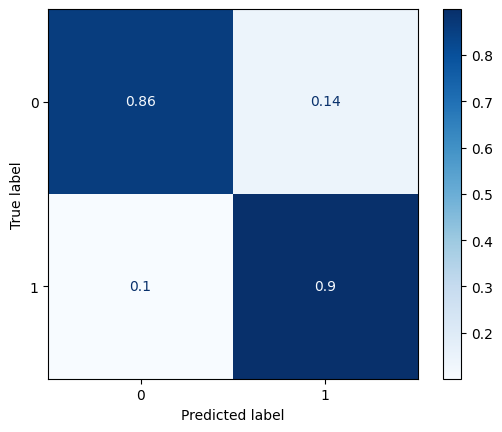

In [169]:
model_tree = RandomForestClassifier(random_state=12345, n_estimators=n_est, max_depth=n_depth, min_samples_split=n_split, min_samples_leaf=n_leaf, class_weight='balanced')
model_tree.fit(x_feat_over_nom, x_target_over)

pred_tree = model_tree.predict_proba(y_feat_over_nom)
pred_ones = pred_tree[:, 1]
pred_valid = pred_ones > n_threshold

print(f"The precision value is: {precision_score(pred_valid, y_target_over)}.")
print(f"The recall value is: {recall_score(pred_valid, y_target_over)}.")
print(f"The F1 value is: {f1_score(pred_valid, y_target_over)}.")

plot_confusion_matrix(model_tree, X=y_feat_over_nom, y_true=y_target_over, normalize='true', cmap='Blues')
plt.show()

The new precision-recall curve is similar to the precision-recall curve in section 4.5.1. This has logic, because if our new F1 score does not differ much from the previous F1 score the plot of the precision-recall curve shall be similar.

The AUC-ROC is: 0.9465017005287664.


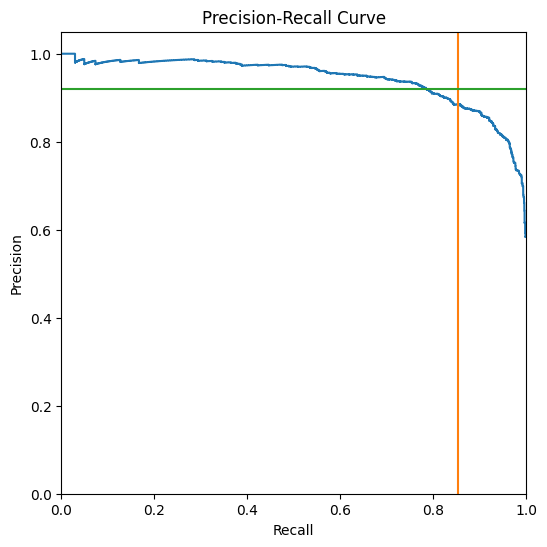

In [124]:
precision_final, recall_final, threshold_final = precision_recall_curve(y_target_over, pred_ones)
pre_final = precision_score(pred_valid, y_target_over)
rec_final = recall_score(pred_valid, y_target_over)

plt.figure(figsize=(6, 6))
plt.step(recall_final, precision_final, where='post')
plt.plot([rec_final, rec_final], [0, 1.05])
plt.plot([0, 1], [pre_final, pre_final])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

We can see a difference in the the new ROC plot, not by its form but for the intersection of the tpr and fpr lines on the curve. This intersection is now much higher on the plot (which means a higher number of true positive values). Does this mean our model will behave different?

The AUC-ROC is: 0.9465017005287664.


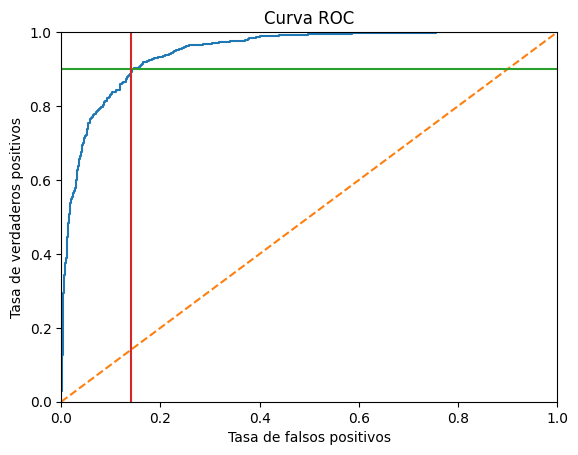

In [120]:
fpr, tpr, thresholds = roc_curve(y_target_over, pred_ones)
print(f"The AUC-ROC is: {roc_auc_score(y_target_over, pred_ones)}.")

plt.figure()

# Plotting the points for fpr and tpr
plt.plot(fpr, tpr)

# Reference ROC curve for 0.5 AUC-ROC and lines of the intersection
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0, 1.0], [0.9, 0.9])
plt.plot([0.14, 0.14], [0, 1.0])

# Set limits from 0 to 1 for x-axis and y-axis
plt.xlim([0, 1])
plt.ylim([0, 1])

# Changing axles labels
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Adding a title to the plot
plt.title("Curva ROC")

plt.show()

If we plot a new confusion matrix with the oversampled ordinal encoded features set and the predicted values with the threshold applied we obtain the model behaves this way:

* The model can predict 100% of the validation set's true negatives as negatives.
* The model can predict 96% of the validation set's true positives as positives.

We do have a change in our model now. `How will the model behave with the test sets?`

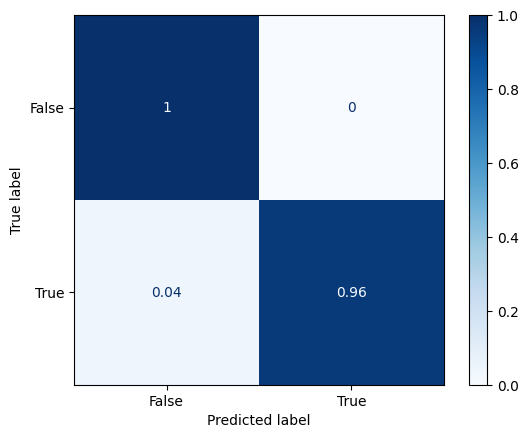

In [126]:
plot_confusion_matrix(model_tree, X=y_feat_over_nom, y_true=pred_valid, normalize='true', cmap='Blues')
plt.show()

### Using the test sets

Applying the same processing as in section 5.1 to the test sets we obtain the following information:

* The F1 score has decreased from 0.885987815491732 to 0.0.8750747160789002 (0.01 point).
* The model can predict 85% of true negatives as negatives and 90% of true positives as positives (a little decrease).
* The model precision score increased from 0.9204339963833634 to 0.9230769230769231 (0.003 points).
* The model recall score decreased from 0.8540268456375839 to 0.8318181818181818 (0.02 points).

The precision value is: 0.9230769230769231.
The recall value is: 0.8318181818181818.
F1 value is: 0.8750747160789002.


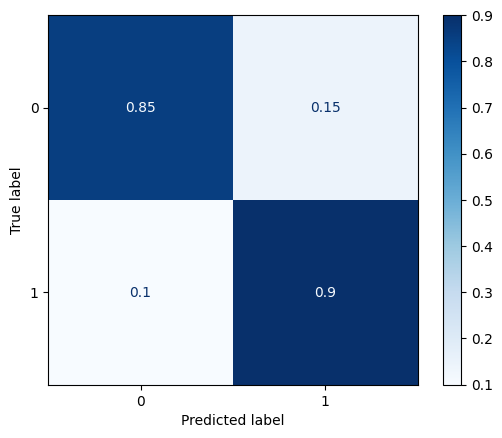

In [170]:
pred_test = model_tree.predict_proba(z_feat_over_nom)
test_ones = pred_test[:, 1]
test_valid = test_ones > n_threshold

print(f"The precision value is: {precision_score(test_valid, z_target_over)}.")
print(f"The recall value is: {recall_score(test_valid, z_target_over)}.")
print(f"F1 value is: {f1_score(test_valid, z_target_over)}.")

plot_confusion_matrix(model_tree, X=z_feat_over_nom, y_true=z_target_over, normalize='true', cmap='Blues')
plt.show()

Similar as in section 5.1, the precision-recall curve does not changed drastically by the same reasons. But is interesting to remark that apparently the curve drops earlier onthis new plot.

The AUC-ROC is: 0.9447931919558653.


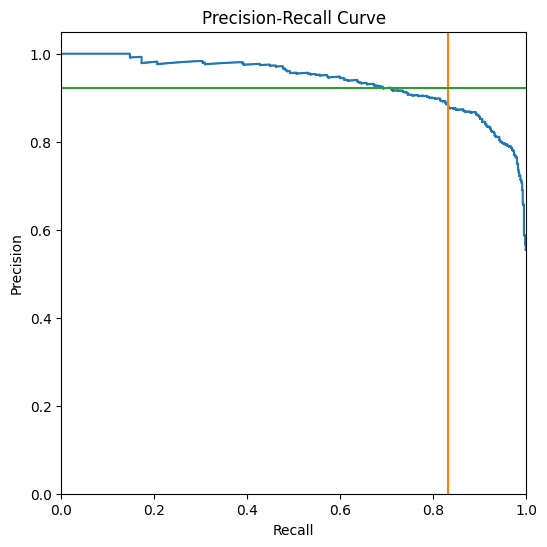

In [126]:
precision_test, recall_test, threshold_test = precision_recall_curve(z_target_over, test_ones)
pre_test = precision_score(test_valid, z_target_over)
rec_test = recall_score(test_valid, z_target_over)

plt.figure(figsize=(6, 6))
plt.step(recall_test, precision_test, where='post')
plt.plot([rec_test, rec_test], [0, 1.05])
plt.plot([0, 1], [pre_test, pre_test])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

Similar as in section 5.1, the ROC plot does not differ much from the new one for the test set, but we have a little decrease on the AUC-ROC result from 0.9465017005287664 to 0.9447931919558653 (aprox. 0.002 points).

The AUC-ROC is: 0.9447931919558653.


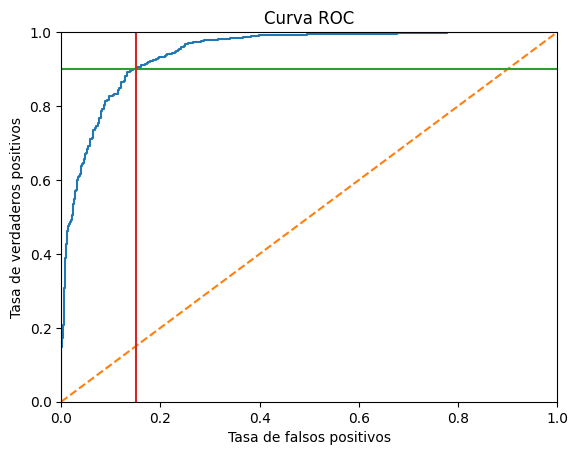

In [118]:
fpr, tpr, thresholds = roc_curve(z_target_over, test_ones)
print(f"The AUC-ROC is: {roc_auc_score(z_target_over, test_ones)}.")

plt.figure()

# Plotting the points for fpr and tpr
plt.plot(fpr, tpr)

# Reference ROC curve for 0.5 AUC-ROC and lines of the intersection
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0, 1.0], [0.9, 0.9])
plt.plot([0.15, 0.15], [0, 1.0])

# Set limits from 0 to 1 for x-axis and y-axis
plt.xlim([0, 1])
plt.ylim([0, 1])

# Changing axles labels
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Adding a title to the plot
plt.title("Curva ROC")

plt.show()

The new confusion matrix plot is similar to the final one we obtained on section 5.1 for the validation set with a slight difference on results:

* The true negatives rate stays the same.
* The true positives rate drops from 96% to 95%.

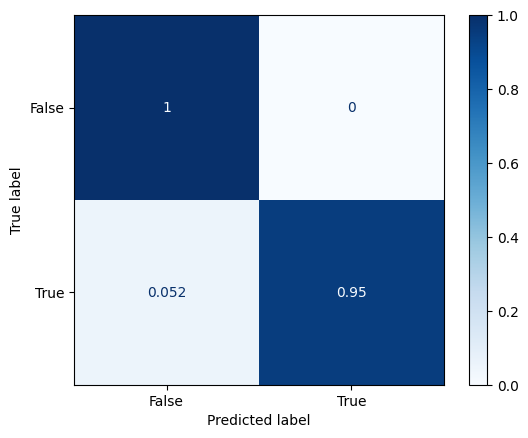

In [127]:
plot_confusion_matrix(model_tree, X=z_feat_over_nom, y_true=test_valid, normalize='true', cmap='Blues')
plt.show()

### Conclusions

We could improve our model drastically with the use of the function on section 5 despite the fact we could not get higher values in the test sets predictions compared to the validation sets predictions.

Nevertheless, we obtained a model with a F1 score much higher than the requested value (0.65). Depending of how optimistic we can get the F1 scores we can use are: 0.885987815491732 (validation sets) and 0.8750747160789002 (test sets) so we can conclude we have achieved the goal for this project and can finish the project with the last Random Forest Classifier model we generated.

## General conclusions

As we could work with many different methods and encode the information in two different ways we can conclude the following:

* If we want to work with Tree-based models we must encode our information with an OrdinalEncode method, and if using LogisticRegression model we shall use an OHE encoding method.

* We must scale all our numeric quantitative values to avoid our models taking columns with high variance in their values have more weight on the prediction.

* We must balance our sets to "help" our models to predict correctly our interest target(s). There are many ways of doing this, but the correct method will vary depending on the required task.

* Despite we may have similar F1 scores there can be a difference between models (as in section 4.5 and sections 5.1 and 5.2) so we should interpret the F1 score prudently.

* Generating a confusion matrix plot along with the ROC plot can help us to interpret correctly the information we are getting.